Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression & Classification, Module 1

- Clean your data and remove outliers
- Plot relationship between feature and target
- Begin with baselines for regression
- Use scikit-learn to fit a linear regression
- Make new predictions and explain coefficients

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).


In [1]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init 
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module1')

In [2]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

# Explore your data and remove outliers

## Overview

### Predict how much a NYC condo costs 🏠💸

[Amateurs & Experts Guess How Much a NYC Condo With a Private Terrace Costs](https://www.youtube.com/watch?v=JQCctBOgH9I)

> Real Estate Agent Leonard Steinberg just sold a pre-war condo in New York City's Tribeca neighborhood. We challenged three people - an apartment renter, an apartment owner and a real estate expert - to try to guess how much the apartment sold for. Leonard reveals more and more details to them as they refine their guesses.


The condo is 1,497 square feet.

Here are the final guesses:

- Apartment Renter: \$15 million
- Apartment Buyer: \$2.2 million
- Real Estate Expert: \$2.2 million

Let's see how we compare!

First, we need data:

- [Kaggle has NYC property sales data](https://www.kaggle.com/new-york-city/nyc-property-sales), but it's not up-to-date.
- The data comes from the [New York City Department of Finance](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page). There's also a glossary of property sales terms and NYC Building Class Code Descriptions
- The data can also be found on the [NYC OpenData](https://data.cityofnewyork.us/browse?q=NYC%20calendar%20sales) portal.

## Follow Along

In [3]:
import pandas as pd
import pandas_profiling

# Read New York City property sales data
df = pd.read_csv('../data/NYC_Citywide_Rolling_Calendar_Sales.csv')

# Change column names: replace spaces with underscores
df.columns = [col.replace(' ', '_') for col in df]

# Get Pandas Profiling Report
df.profile_report()

In [4]:
# Does this data include the Tribeca neighborhood?
mask = df['NEIGHBORHOOD'].str.contains('TRIBECA')
df[mask]

BOROUGH NEIGHBORHOOD            BUILDING_CLASS_CATEGORY  \
220          1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
763          1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
996          1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
1276         1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
1542         1      TRIBECA            02 TWO FAMILY DWELLINGS   
1543         1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
1855         1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
2170         1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
2413         1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
2414         1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
2415         1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
2416         1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
2726         1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
2987         1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
3314         1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
3315         1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
3316         1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
4002         1      TRIBECA   08 RENTALS - ELEVATOR APARTMENTS   
4003         1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
4439         1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
4773         1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
4774         1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
5119         1      TRIBECA     10 COOPS - ELEVATOR APARTMENTS   
5120         1      TRIBECA     10 COOPS - ELEVATOR APARTMENTS   
5403         1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
5404         1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
5721         1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
5722         1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
5723         1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
5724         1      TRIBECA                     17 CONDO COOPS   
...        ...          ...                                ...   
18198        1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
18477        1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
18930        1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
19199        1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
19474        1      TRIBECA     10 COOPS - ELEVATOR APARTMENTS   
19475        1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
19476        1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
19477        1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
19478        1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
19751        1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
19989        1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
20252        1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
20253        1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
20254        1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
20255        1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
20502        1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
20503        1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
20779        1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
21523        1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
21524        1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
21798        1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
21932        1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
22074        1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
22075        1      TRIBECA  15 CONDOS - 2-10 UNIT RESIDENTIAL   
22220        1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
22221        1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
22732        1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
22733        1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
22897        1      TRIBECA    13 CONDOS - ELEV

In [5]:
# Keep this subset
df = df[mask]

# Down from > 20k rows to < 150
df.shape

(146, 21)

In [6]:
# Why so few property sales in Tribeca?
# Check the date range
# It's just the first 4 months of 2019
df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'], infer_datetime_format=True)
df['SALE_DATE'].describe()

count                     146
unique                     66
top       2019-02-12 00:00:00
freq                       17
first     2019-01-03 00:00:00
last      2019-04-30 00:00:00
Name: SALE_DATE, dtype: object

In [7]:
# See the Pandas Profiling Report:
# SALE_PRICE was read as strings
df['SALE_PRICE'] = (
    df['SALE_PRICE']
    .str.replace('$','')
    .str.replace('-','')
    .str.replace(',','')
    .astype(int)
)

In [8]:
# SALE_PRICE is now a number, but hard to read in scientific notation
# Format numbers: Comma separator for thousands. Zero decimals
pd.options.display.float_format = '{:,.0f}'.format
df.describe()

BOROUGH  BLOCK   LOT  EASE-MENT  ZIP_CODE  RESIDENTIAL_UNITS  \
count      146    146   146          0       146                146   
mean         1    123 1,980        nan     9,732                  3   
std          0     84 1,738        nan     1,843                 23   
min          1     16     1        nan         0                  0   
25%          1     16 1,112        nan    10,007                  1   
50%          1    142 1,362        nan    10,013                  1   
75%          1    212 2,194        nan    10,013                  1   
max          1    224 9,057        nan    10,282                283   

       COMMERCIAL_UNITS  TOTAL_UNITS  GROSS_SQUARE_FEET  YEAR_BUILT  \
count               146          146                146         146   
mean                  0            3              4,574       1,595   
std                   0           24             25,521         781   
min                   0            0                  0           0   
25%                   0            1                862       1,905   
50%                   0            1              1,788       1,986   
75%                   0            1              2,522       2,006   
max                   4          286            305,542       2,016   

       TAX_CLASS_AT_TIME_OF_SALE  SALE_PRICE  
count                        146         146  
mean                           2   8,884,964  
std                            0  23,639,981  
min                            1           0  
25%                            2     976,875  
50%                            2   2,750,000  
75%                            2   7,131,025  
max                            4 260,000,000

In [9]:
# Max SCALE_PRICE is $260 million!
# Look at this observation.
# Equivalent to: df[df['SALE_PRICE']==260000000]
df.query('SALE_PRICE == 260000000')

BOROUGH NEIGHBORHOOD           BUILDING_CLASS_CATEGORY  \
6499        1      TRIBECA  08 RENTALS - ELEVATOR APARTMENTS   

     TAX_CLASS_AT_PRESENT  BLOCK  LOT  EASE-MENT BUILDING_CLASS_AT_PRESENT  \
6499                    2    224    1        nan                        D8   

                   ADDRESS APARTMENT_NUMBER    ...      RESIDENTIAL_UNITS  \
6499  34 DESBROSSES STREET              NaN    ...                    283   

      COMMERCIAL_UNITS  TOTAL_UNITS  LAND_SQUARE_FEET GROSS_SQUARE_FEET  \
6499                 3          286            36,858           305,542   

      YEAR_BUILT  TAX_CLASS_AT_TIME_OF_SALE  BUILDING_CLASS_AT_TIME_OF_SALE  \
6499       2,007                          2                              D8   

     SALE_PRICE  SALE_DATE  
6499  260000000 2019-02-01  

[1 rows x 21 columns]

In [10]:
# How many property sales were for multiple units?
df['TOTAL_UNITS'].value_counts()

1      131
0       11
5        1
286      1
8        1
3        1
Name: TOTAL_UNITS, dtype: int64

In [11]:
# Keep only the single units

# Would this be better though?
# df = df[(df.RESIDENTIAL_UNITS==1) & (df.COMMERICAL_UNITS==0)]

df = df.query('TOTAL_UNITS==1')
df.describe()

BOROUGH  BLOCK   LOT  EASE-MENT  ZIP_CODE  RESIDENTIAL_UNITS  \
count      131    131   131          0       131                131   
mean         1    118 2,189        nan     9,700                  1   
std          0     86 1,711        nan     1,943                  0   
min          1     16 1,001        nan         0                  0   
25%          1     16 1,130        nan    10,007                  1   
50%          1    141 1,441        nan    10,013                  1   
75%          1    214 2,450        nan    10,280                  1   
max          1    223 9,057        nan    10,282                  1   

       COMMERCIAL_UNITS  TOTAL_UNITS  GROSS_SQUARE_FEET  YEAR_BUILT  \
count               131          131                131         131   
mean                  0            1              2,520       1,572   
std                   0            0              4,772         805   
min                   0            1                432           0   
25%                   0            1                982       1,905   
50%                   0            1              1,900       1,987   
75%                   0            1              2,508       2,006   
max                   1            1             39,567       2,016   

       TAX_CLASS_AT_TIME_OF_SALE  SALE_PRICE  
count                        131         131  
mean                           2   7,626,487  
std                            0  11,460,762  
min                            2           0  
25%                            2     978,750  
50%                            2   3,145,000  
75%                            2   7,461,000  
max                            4  39,285,000

In [12]:
# Now max sales price is $39 million
# Look at this observation
# It's huge, over 8,000 square feet
# Maybe it's legit, just a huge, expensive condo
df.query('SALE_PRICE == 39285000')

BOROUGH NEIGHBORHOOD          BUILDING_CLASS_CATEGORY  \
9236        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   

     TAX_CLASS_AT_PRESENT  BLOCK   LOT  EASE-MENT BUILDING_CLASS_AT_PRESENT  \
9236                    2    223  1144        nan                        R4   

                    ADDRESS APARTMENT_NUMBER    ...      RESIDENTIAL_UNITS  \
9236  70 VESTRY STREET, 12S              12S    ...                      1   

      COMMERCIAL_UNITS  TOTAL_UNITS  LAND_SQUARE_FEET GROSS_SQUARE_FEET  \
9236                 0            1                 0             8,346   

      YEAR_BUILT  TAX_CLASS_AT_TIME_OF_SALE  BUILDING_CLASS_AT_TIME_OF_SALE  \
9236       2,016                          2                              R4   

     SALE_PRICE  SALE_DATE  
9236   39285000 2019-02-15  

[1 rows x 21 columns]

In [13]:
# The min sales price is $0

# There's a glossary here: 
# https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page

# It says:

# A $0 sale indicates that there was a transfer of ownership without a 
# cash consideration. There can be a number of reasons for a $0 sale including 
# transfers of ownership from parents to children. 

# How often did $0 sales occur in this subset of the data?
len(df.query('SALE_PRICE == 0'))

15

In [14]:
# 75% percentile for gross square feet is 2,500
# But the max is over 39,000 square feet.

# Look at property sales for > 5,000 square feet

# We see the same condo we looked at earlier,
# Plus two property sales at 39,567 square feet.
# TOTAL_UNITS = 1, but BUILDING_CLASS_CATEGORY = 2-10 UNIT RESIDENTIAL
# Is this dirty data?

df.query('GROSS_SQUARE_FEET > 5000')

BOROUGH NEIGHBORHOOD            BUILDING_CLASS_CATEGORY  \
9236         1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
10487        1      TRIBECA  15 CONDOS - 2-10 UNIT RESIDENTIAL   
16008        1      TRIBECA  15 CONDOS - 2-10 UNIT RESIDENTIAL   

      TAX_CLASS_AT_PRESENT  BLOCK   LOT  EASE-MENT BUILDING_CLASS_AT_PRESENT  \
9236                     2    223  1144        nan                        R4   
10487                   2C    179  1607        nan                        R1   
16008                   2C    179  1602        nan                        R1   

                     ADDRESS APARTMENT_NUMBER    ...      RESIDENTIAL_UNITS  \
9236   70 VESTRY STREET, 12S              12S    ...                      1   
10487    24 LEONARD ST, PH W             PH W    ...                      1   
16008   24 LEONARD STREET, 2                2    ...                      1   

       COMMERCIAL_UNITS  TOTAL_UNITS  LAND_SQUARE_FEET GROSS_SQUARE_FEET  \
9236                  0            1                 0             8,346   
10487                 0            1             9,983            39,567   
16008                 0            1             9,983            39,567   

       YEAR_BUILT  TAX_CLASS_AT_TIME_OF_SALE  BUILDING_CLASS_AT_TIME_OF_SALE  \
9236        2,016                          2                              R4   
10487       1,940                          2                              R1   
16008       1,940                          2                              R1   

      SALE_PRICE  SALE_DATE  
9236    39285000 2019-02-15  
10487    9857100 2019-02-22  
16008    9718000 2019-03-21  

[3 rows x 21 columns]

In [15]:
# What are the building class categories?
# How frequently does each occur?

df['BUILDING_CLASS_CATEGORY'].value_counts()

13 CONDOS - ELEVATOR APARTMENTS               121
15 CONDOS - 2-10 UNIT RESIDENTIAL               8
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT      1
46 CONDO STORE BUILDINGS                        1
Name: BUILDING_CLASS_CATEGORY, dtype: int64

In [16]:
# Keep subset of rows:
# Sale price more than $0, 
# Building class category = Condos - Elevator Apartments

mask = (df['SALE_PRICE'] > 0) & (df['BUILDING_CLASS_CATEGORY'] == '13 CONDOS - ELEVATOR APARTMENTS')
df = df[mask]

# Down to 106 rows
df.shape

(106, 21)

## Challenge

In your assignment, you'll use another New York City real estate dataset. You'll predict how much it costs to rent an apartment, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website. When you do the assignment, look at the data. What's the distribution of the target, `price`, and features such as `longitude` and `latitude`? Remove outliers.

# Plot relationship between feature and target

## Overview

- [Plotly Express](https://plot.ly/python/plotly-express/) examples
- [plotly_express.scatter](https://www.plotly.express/plotly_express/#plotly_express.scatter) docs

## Follow Along

In [17]:
# Scatter plot
import plotly.express as px
px.scatter(df, x='GROSS_SQUARE_FEET', y='SALE_PRICE')

In [18]:
# With OLS (Ordinary Least Squares) trendline,
# The outliers influence the "line of best fit"
px.scatter(df, x='GROSS_SQUARE_FEET', y='SALE_PRICE', trendline='ols')

In [19]:
# Look at sales for more than $35 million

# All are at 70 Vestry Street
# All but one have the same SALE_PRICE & SALE_DATE
# Was the SALE_PRICE for each? Or in tital?
# Is this dirty data?

df.query('SALE_PRICE > 35000000')

BOROUGH NEIGHBORHOOD          BUILDING_CLASS_CATEGORY  \
8370        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8371        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8372        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8373        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8374        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8375        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8376        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8377        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8378        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8379        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8380        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8381        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8382        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8383        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8384        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
9236        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   

     TAX_CLASS_AT_PRESENT  BLOCK   LOT  EASE-MENT BUILDING_CLASS_AT_PRESENT  \
8370                    2    223  1105        nan                        R4   
8371                    2    223  1123        nan                        R4   
8372                    2    223  1124        nan                        R4   
8373                    2    223  1125        nan                        R4   
8374                    2    223  1126        nan                        R4   
8375                    2    223  1127        nan                        R4   
8376                    2    223  1128        nan                        R4   
8377                    2    223  1129        nan                        R4   
8378                    2    223  1130        nan                        R4   
8379                    2    223  1131        nan                        R4   
8380                    2    223  1132        nan                        R4   
8381                    2    223  1134        nan                        R4   
8382                    2    223  1137        nan                        R4   
8383                    2    223  1140        nan                        R4   
8384                    2    223  1143        nan                        R4   
9236                    2    223  1144        nan                        R4   

                    ADDRESS APARTMENT_NUMBER    ...      RESIDENTIAL_UNITS  \
8370   70 VESTRY STREET, 3C               3C    ...                      1   
8371   70 VESTRY STREET, 6C               6C    ...                      1   
8372   70 VESTRY STREET, 6D               6D    ...                      1   
8373   70 VESTRY STREET, 6E               6E    ...                      1   
8374   70 VESTRY STREET, 6F               6F    ...                      1   
8375   70 VESTRY STREET, 7A               7A    ...                      1   
8376   70 VESTRY STREET, 7B               7B    ...                      1   
8377   70 VESTRY STREET, 7C               7C    ...                      1   
8378   70 VESTRY STREET, 7D               7D    ...                      1   
8379   70 VESTRY STREET, 7E               7E    ...                      1   
8380   70 VESTRY STREET, 7F               7F    ...                      1   
8381   70 VESTRY STREET, 8W               8W    ...                      1   
8382   70 VESTRY STREET, 9W               9W    ...                      1   
8383  70 VESTRY STREET, 10W              10W    ...                      1   
8384  70 VESTRY STREET, 11W              11W    ...                      1   
9236  70 VESTRY STREET, 12S              12S    ...                      1   

      COMMERCIAL_UNITS  TOTAL_UNITS  LAND_SQUARE_FEET GROSS_SQUARE_FEET  \
8370                 0            1                 0             1,670   
8371                 0            1                 0             1,906   
8372                 0            1   

In [20]:
# Make a judgment call:
# Keep rows where sale price was < $35 million
df = df.query('SALE_PRICE < 35000000')

# Down to 90 rows
df.shape

(90, 21)

## Challenge

In your assignment, you will choose a feature, and plot its relationship with the target.

# Begin with baselines for regression

## Overview

Now I've subset my data, I've removed what I've considered to be outliers. Before I make a _predictive_ model, just how would I _describe_ the sales price? 

Before we _predict_ it, we just want to be able to _describe_ it. With visualizations, like we did before, and even just with pandas methods like you've been using all throughout Lambda School. 

So I can do `df['SALE_PRICE'].describe()` and I can see that now in my
dataset the mean sale price is $3.9 million, when I've excluded those those outliers. 

The mean still is higher than the median, but you better believe it
would have been much higher if I hadn't excluded those outliers. So it all depends on our assumptions.

But here's the interesting thing: **we could use this one number as a "prediction", if we didn't have any data except for sales price...** 

Imagine we didn't have any any other information about condos, then what would you tell somebody? If you had some sales prices like this but you didn't have any of these other columns. If somebody asked you, "How much do you think a condo in Tribeca costs?"

You could say, "Well, I've got 90 sales prices here, and I see that on average they cost $3.9 nine million."

So we do this all the time in the real world. We use descriptive
statistics for prediction. And that's not wrong or bad, in fact **that's where you should start. This is called the _mean baseline_.**

## Follow Along

In [21]:
# The Mean Sale Price is $3.9 million.
# If we didn't use any data except sales prices,
# we could "predict" that Tribeca condos cost about $3.9 million.
# This is called the "mean baseline."
df['SALE_PRICE'].describe()

count           90
mean     3,928,736
std      3,621,996
min        424,770
25%      1,156,552
50%      2,750,000
75%      5,087,500
max     15,000,000
Name: SALE_PRICE, dtype: float64

In [22]:
# But we *can* use more data beyond the sales price.
# Re-plot the relationship between gross square feet and sale pruce.
px.scatter(df, x='GROSS_SQUARE_FEET', y='SALE_PRICE', trendline='ols')

## Challenge

In your assignment, after you remove outliers, what is the mean price in your subset of the data?

# Use scikit-learn to fit a linear regression

## Overview

#### Jake VanderPlas, [_Python Data Science Handbook_, Chapter 5.2: Introducing Scikit-Learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API)

The best way to think about data within Scikit-Learn is in terms of tables of data. 

![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.02-samples-features.png)

The features matrix is often stored in a variable named `X`. The features matrix is assumed to be two-dimensional, with shape `[n_samples, n_features]`, and is most often contained in a NumPy array or a Pandas `DataFrame`.

We also generally work with a label or target array, which by convention we will usually call `y`. The target array is usually one dimensional, with length `n_samples`, and is generally contained in a NumPy array or Pandas `Series`. The target array may have continuous numerical values, or discrete classes/labels. 

The target array is the quantity we want to _predict from the data_: in statistical terms, it is the dependent variable. 

Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.

Most commonly, the steps in using the Scikit-Learn estimator API are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the `fit()` method of the model instance.
5. Apply the Model to new data: For supervised learning, often we predict labels for unknown data using the `predict()` method.

## Follow Along

In [23]:
# 1. Import the appropriate estimator class from Scikit-Learn
from sklearn.linear_model import LinearRegression

# 2. Instantiate this class
model = LinearRegression()

# 3. Arrange X features matrix & y target vector
features = ['GROSS_SQUARE_FEET']
target = 'SALE_PRICE'
X = df[features]
y = df[target]

# 4. Fit the model
model.fit(X, y)

# 5. Apply the model
y_pred = model.predict(X)

## Challenge

In your assignment, you will use scikit-learn for linear regression with one feature. For a stretch goal, you can do linear regression with two or more features.

# Make new predictions and explain coefficients

## Overview


Now we've generated our predictions, and we can we can look a plot of actual prices versus predicted prices. 



## Follow Along

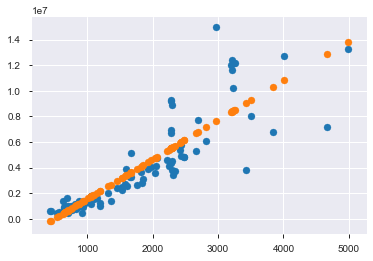

In [24]:
# plot actual vs predicted
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.scatter(X, y_pred);

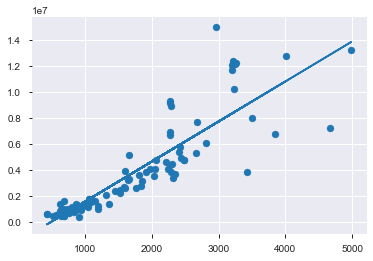

In [25]:
# Interpolate
plt.scatter(X, y)
plt.plot(X, y_pred);

**What pattern did the model "learn", about the relationship between square feet & price?**

To help answer this question, we'll look at the  `coef_` and `intercept_` attributes of the `LinearRegression` object, which are documented here: 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [26]:
model.coef_[0]

3076.447655419002

In [27]:
model.intercept_

-1505364.0408585505

In [28]:
# Equations for a line
print('y = mx + b')
print(f'y = {model.coef_[0]}*x + {model.intercept_}')
print(f'price = {model.coef_[0]}*square_feet + {model.intercept_}')

y = mx + b
y = 3076.447655419002*x + -1505364.0408585505
price = 3076.447655419002*square_feet + -1505364.0408585505


In [29]:
# 5. Apply the model to *new/unknown* data
def predict(square_feet):
    y_pred = model.predict([[square_feet]])
    return y_pred[0]

predict(1497)

3100078.099303695

In [30]:
# Give nicer output
def predict(square_feet):
    y_pred = model.predict([[square_feet]])
    estimate = y_pred[0]
    coefficient = model.coef_[0]
    
    # Format with $ and comma separators. No decimals.
    result = f'${estimate:,.0f} estimated price for {square_feet:,.0f} square foot condo in Tribeca.'
    explanation = f' Each additional square foot is associated with a ${coefficient:,.0f} increase in this model.'
    return result + explanation

predict(1497)

'$3,100,078 estimated price for 1,497 square foot condo in Tribeca. Each additional square foot is associated with a $3,076 increase in this model.'

In [31]:
# What does the model for low square footage?
predict(500)

'$32,860 estimated price for 500 square foot condo in Tribeca. Each additional square foot is associated with a $3,076 increase in this model.'

In [32]:
# For high square footage?
predict(10000)

'$29,259,113 estimated price for 10,000 square foot condo in Tribeca. Each additional square foot is associated with a $3,076 increase in this model.'

In [33]:
# These values are outside the min & max of the data the model was fit on,
# but predictive models assume future data will have similar distribution.
df['SALE_PRICE'].describe()

count           90
mean     3,928,736
std      3,621,996
min        424,770
25%      1,156,552
50%      2,750,000
75%      5,087,500
max     15,000,000
Name: SALE_PRICE, dtype: float64

In [34]:
df['GROSS_SQUARE_FEET'].describe()

count      90
mean    1,766
std     1,019
min       432
25%       874
50%     1,626
75%     2,308
max     4,986
Name: GROSS_SQUARE_FEET, dtype: float64

In [35]:
predict(630)

'$432,798 estimated price for 630 square foot condo in Tribeca. Each additional square foot is associated with a $3,076 increase in this model.'

In [36]:
# Re-run the prediction functon interactively
from ipywidgets import interact
interact(predict, square_feet=(630, 5000)); # (min, max)

interactive(children=(IntSlider(value=2815, description='square_feet', max=5000, min=630), Output()), _dom_cla…

### Organize & comment code

Putting it all together!

In [41]:
from ipywidgets import interact
import pandas as pd
from sklearn.linear_model import LinearRegression

# Read New York City property sales data, from first 4 months of 2019.
# Dataset has 23040 rows, 21 columns.
df = pd.read_csv('../data/NYC_Citywide_Rolling_Calendar_Sales.csv')
assert df.shape == (23040, 21)

# Change column names. Replace spaces with underscores
df.columns = [col.replace(' ', '_') for col in df]

# Remove symbols from SALE_PRICE string, convert to integer
df['SALE_PRICE'] = (
    df['SALE_PRICE']
    .str.replace('$','')
    .str.replace('-','')
    .str.replace(',','')
    .astype(int)
)

# Keep subset of rows:
# Tribeca neighborhood, Condos - Elevator Apartments, 
# 1 unit, sale price more than $1, less than $35 million
mask = (
    (df['NEIGHBORHOOD'].str.contains('TRIBECA')) & 
    (df['BUILDING_CLASS_CATEGORY'] == '13 CONDOS - ELEVATOR APARTMENTS') &
    (df['TOTAL_UNITS'] == 1) & 
    (df['SALE_PRICE'] > 0) & 
    (df['SALE_PRICE'] < 35000000)
)
df = df[mask]

# Data now has 90 rows, 21 columns
assert df.shape == (90, 21)

# Convert SALE_DATE to datetime
df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'], infer_datetime_format=True)

# Arrange X features matrix & y target vector
features = ['GROSS_SQUARE_FEET']
target = 'SALE_PRICE'
X = df[features]
y = df[target]

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict
def predict(square_feet):
    y_pred = model.predict([[square_feet]])
    estimate = y_pred[0]
    coefficient = model.coef_[0]
    
    # Format with $ and comma separators. No decimals.
    result = f'${estimate:,.0f} estimated price for {square_feet:,.0f} square foot condo in Tribeca.'
    explanation = f' Each additional square foot adds about ${coefficient:,.0f}'
    return result + explanation

interact(predict, square_feet=(630, 5000)); # (min, max)

interactive(children=(IntSlider(value=2815, description='square_feet', max=5000, min=630), Output()), _dom_cla…

### How'd we do? ...

[Amateurs & Experts Guess How Much a NYC Condo With a Private Terrace Costs](https://www.youtube.com/watch?v=JQCctBOgH9I)

> Real Estate Agent Leonard Steinberg just sold a pre-war condo in New York City's Tribeca neighborhood. We challenged three people - an apartment renter, an apartment owner and a real estate expert - to try to guess how much the apartment sold for. Leonard reveals more and more details to them as they refine their guesses.


The condo is 1,497 square feet.

Here are the final guesses from the video:

- Apartment Renter: \$15 million
- Apartment Buyer: \$2.2 million
- Real Estate Expert: \$2.2 million

Here's our prediction from our model:

In [42]:
predict(1497)

'$3,100,078 estimated price for 1,497 square foot condo in Tribeca. Each additional square foot adds about $3,076'

___The final answer is revealed in [the video at 12:28](https://youtu.be/JQCctBOgH9I?t=748)!___

What was the error for our prediction, versus the people in the video?

## Challenge

In your assignment, you will define a function to make new predictions and explain the model coefficient.

# Review


You'll practice these objectives when you do your assignment:

- Clean your data and remove outliers
- Plot relationship between feature and target
- Begin with baselines for regression
- Use scikit-learn to fit a linear regression
- Make new predictions and explain coefficients


You'll use another New York City real estate dataset. You'll predict how much it costs to rent an apartment, instead of how much it costs to buy a condo.

You've been provided with a separate notebook for your assignment, which has all the instructions and stretch goals. Good luck and have fun!

# Sources

#### Plotly Express
- [Plotly Express](https://plot.ly/python/plotly-express/) examples
- [plotly_express.scatter](https://www.plotly.express/plotly_express/#plotly_express.scatter) docs

#### NYC Real Estate
- [Amateurs & Experts Guess How Much a NYC Condo With a Private Terrace Costs](https://www.youtube.com/watch?v=JQCctBOgH9I)
- [Kaggle has NYC property sales data](https://www.kaggle.com/new-york-city/nyc-property-sales), but it's not up-to-date.
- The data comes from the [New York City Department of Finance](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page). There's also a glossary of property sales terms and NYC Building Class Code Descriptions
- The data can also be found on the [NYC OpenData](https://data.cityofnewyork.us/browse?q=NYC%20calendar%20sales) portal.

#### Scikit-Learn
- Jake VanderPlas, [_Python Data Science Handbook_, Chapter 5.2: Introducing Scikit-Learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API)
- [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)